<a href="https://colab.research.google.com/github/Naufal-Eurasia/Classification-and-Summarization-of-Windows-10-and-Windows-11-Growth/blob/main/Classification_and_Summarization_of_Windows_10_and_Windows_11_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# RUN THIS CELL FIRST (Colab biasanya sudah punya pandas, sklearn, matplotlib)
!pip -q install scikit-learn pandas matplotlib

In [ ]:
# Upload file dari komputer (popup file chooser)
from google.colab import files
import io, pandas as pd

uploaded = files.upload()  # pilih file windows_version-ww-monthly-202407-202507.csv
# take the first uploaded filename
FNAME = next(iter(uploaded.keys()))
print("Uploaded:", FNAME)
df = pd.read_csv(io.BytesIO(uploaded[FNAME]))


Saving windows_version-ww-monthly-202407-202507.csv to windows_version-ww-monthly-202407-202507.csv
Uploaded: windows_version-ww-monthly-202407-202507.csv


In [ ]:
# Inspect dataset and try to detect Windows 11 column
import pandas as pd, numpy as np

print("shape:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())

# try to find a Windows 11 column by common names
cols = df.columns.tolist()
win11_col = None
candidates = [c for c in cols if 'windows 11' in c.lower() or 'windows11' in c.lower() or 'win 11' in c.lower() or ('11' in c and 'win' in c.lower())]
if candidates:
    win11_col = candidates[0]
    print("Detected Windows11 column:", win11_col)
else:
    # Try long-format (Version / Share)
    lowcols = [c.lower() for c in cols]
    if 'version' in lowcols and ('share' in lowcols or 'percentage' in lowcols or 'value' in lowcols):
        print("Detected long format (version/share). We'll pivot.")
        # pivot below in next cell
    else:
        print("!! Could not auto-detect Windows 11 column. Check df.columns and tell me which column has Windows 11 share.")


shape: (13, 10)


,Date,Win10,Win11,Win7,WinXP,Win8.1,Win8,WinVista,Win2003,Other
0,2024-07,64.99,30.83,3.04,0.38,0.42,0.25,0.07,0.02,0.00
1,2024-08,64.14,31.63,3.05,0.40,0.41,0.28,0.06,0.02,0.01
2,2024-09,62.75,33.42,2.84,0.34,0.36,0.22,0.04,0.02,0.01
3,2024-10,60.95,35.58,2.62,0.28,0.31,0.19,0.04,0.02,0.01
4,2024-11,61.83,34.94,2.47,0.25,0.31,0.16,0.03,0.01,0.01



Columns: ['Date', 'Win10', 'Win11', 'Win7', 'WinXP', 'Win8.1', 'Win8', 'WinVista', 'Win2003', 'Other']
Detected Windows11 column: Win11


from matplotlib import pyplot as plt
_df_0['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Win11'].plot(kind='hist', bins=20, title='Win11')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Win7'].plot(kind='hist', bins=20, title='Win7')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['WinXP'].plot(kind='hist', bins=20, title='WinXP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Win10', y='Win11', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Win11', y='Win7', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Win7', y='WinXP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='WinXP', y='Win8.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win11']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win11')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win7']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win7')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['WinXP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('WinXP')

from matplotlib import pyplot as plt
_df_13['Win10'].plot(kind='line', figsize=(8, 4), title='Win10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Win11'].plot(kind='line', figsize=(8, 4), title='Win11')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Win7'].plot(kind='line', figsize=(8, 4), title='Win7')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['WinXP'].plot(kind='line', figsize=(8, 4), title='WinXP')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Win10', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Win11', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Win7', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='WinXP', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

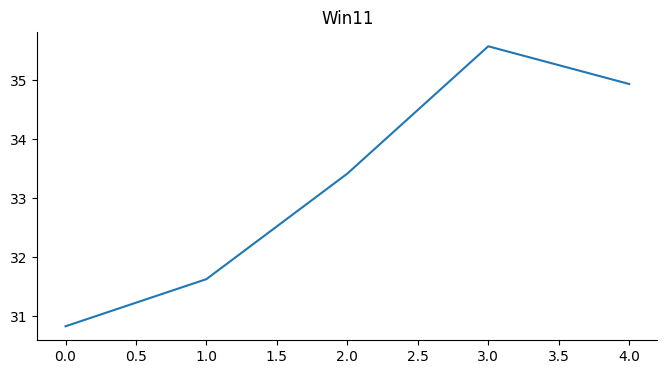

In [ ]:
from matplotlib import pyplot as plt
_df_14['Win11'].plot(kind='line', figsize=(8, 4), title='Win11')
plt.gca().spines[['top', 'right']].set_visible(False)

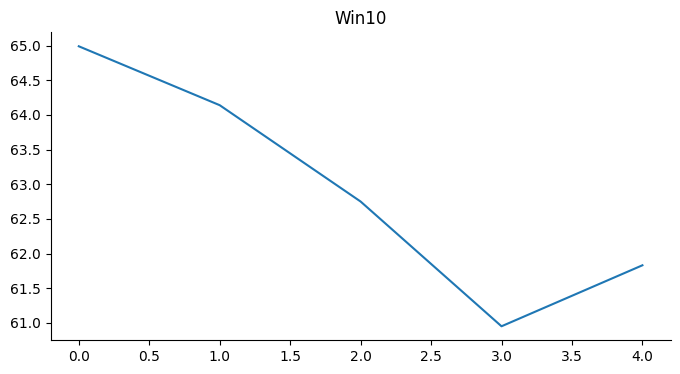

In [ ]:
from matplotlib import pyplot as plt
_df_13['Win10'].plot(kind='line', figsize=(8, 4), title='Win10')
plt.gca().spines[['top', 'right']].set_visible(False)

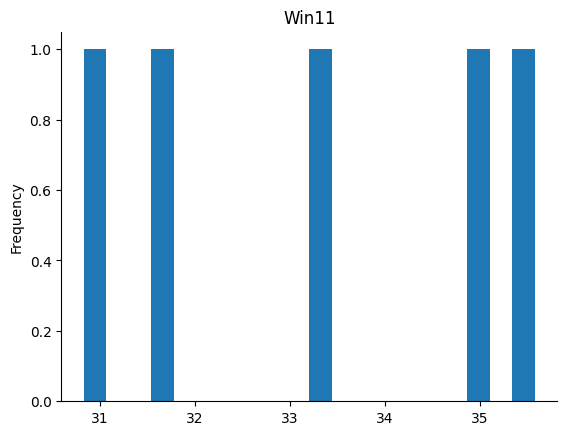

In [ ]:
from matplotlib import pyplot as plt
_df_1['Win11'].plot(kind='hist', bins=20, title='Win11')
plt.gca().spines[['top', 'right',]].set_visible(False)

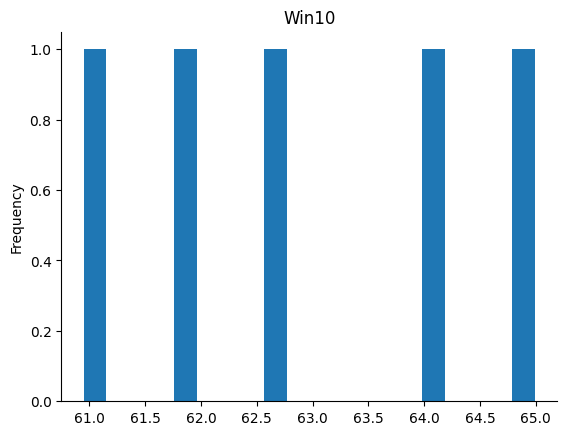

In [ ]:
from matplotlib import pyplot as plt
_df_0['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pandas as pd, numpy as np

# If file is wide format (month/date column + many OS columns)
# Try to find a date/month column:
date_candidates = [c for c in df.columns if 'date' in c.lower() or 'month' in c.lower() or 'period' in c.lower() or 'year' in c.lower()]
date_col = date_candidates[0] if date_candidates else None
print("Date candidates:", date_candidates)

# CASE A: wide format (have date/month column and Windows 11 column)
if date_col and ('win11_col' in globals() and win11_col is not None):
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.dropna(subset=[date_col])
    df = df.sort_values(date_col).reset_index(drop=True)
    df['month'] = pd.to_datetime(df[date_col]).dt.to_period('M').dt.to_timestamp()
    # ensure numeric percent
    df['win11_pct'] = pd.to_numeric(df[win11_col].astype(str).str.replace('%',''), errors='coerce')
    print("Using wide format. Rows:", len(df))

# CASE B: long format (rows: version + share + month)
else:
    # try to find version/share style columns
    lowcols = [c.lower() for c in df.columns]
    if 'version' in lowcols and ('share' in lowcols or 'percentage' in lowcols or 'value' in lowcols):
        vcol = df.columns[lowcols.index('version')]
        shcol_candidates = [c for c in df.columns if 'share' in c.lower() or 'percentage' in c.lower() or 'value' in c.lower()]
        shcol = shcol_candidates[0]
        # time column if exists
        tcol = None
        for cand in df.columns:
            if 'date' in cand.lower() or 'month' in cand.lower():
                tcol = cand; break
        if tcol:
            df[tcol] = pd.to_datetime(df[tcol], errors='coerce')
            # pivot to wide: index by month, columns = versions, values = share
            pivot = df.pivot_table(index=tcol, columns=vcol, values=shcol, aggfunc='first').reset_index()
            pivot = pivot.sort_values(tcol).rename(columns={tcol:'month'})
            # try to find Windows 11 column name in pivot
            pivot_cols = pivot.columns.tolist()
            w11cols = [c for c in pivot_cols if '11' in str(c) and ('win' in str(c).lower() or 'window' in str(c).lower())]
            if w11cols:
                pivot['win11_pct'] = pd.to_numeric(pivot[w11cols[0]].astype(str).str.replace('%',''), errors='coerce')
                df = pivot[['month','win11_pct']].copy()
            else:
                raise ValueError("Could not find Windows 11 column after pivot. Columns: " + ", ".join(pivot_cols))
        else:
            raise ValueError("Long format detected but no date column to pivot by. Please supply month/date column.")
    else:
        raise ValueError("Unrecognized CSV format. See df.columns above and edit code to point to the right fields.")

# Final check
df = df.dropna(subset=['win11_pct']).reset_index(drop=True)
print("Final dataset rows:", len(df))
display(df.head())


Date candidates: ['Date']
Using wide format. Rows: 13
Final dataset rows: 13


,Date,Win10,Win11,Win7,WinXP,Win8.1,Win8,WinVista,Win2003,Other,month,win11_pct
0,2024-07-01,64.99,30.83,3.04,0.38,0.42,0.25,0.07,0.02,0.00,2024-07-01,30.83
1,2024-08-01,64.14,31.63,3.05,0.40,0.41,0.28,0.06,0.02,0.01,2024-08-01,31.63
2,2024-09-01,62.75,33.42,2.84,0.34,0.36,0.22,0.04,0.02,0.01,2024-09-01,33.42
3,2024-10-01,60.95,35.58,2.62,0.28,0.31,0.19,0.04,0.02,0.01,2024-10-01,35.58
4,2024-11-01,61.83,34.94,2.47,0.25,0.31,0.16,0.03,0.01,0.01,2024-11-01,34.94


from matplotlib import pyplot as plt
_df_21['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Win11'].plot(kind='hist', bins=20, title='Win11')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Win7'].plot(kind='hist', bins=20, title='Win7')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['WinXP'].plot(kind='hist', bins=20, title='WinXP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='Win10', y='Win11', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Win11', y='Win7', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='Win7', y='WinXP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='WinXP', y='Win8.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win11']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win11')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Win7']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Win7')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['WinXP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('WinXP')

from matplotlib import pyplot as plt
_df_33['Win10'].plot(kind='line', figsize=(8, 4), title='Win10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Win11'].plot(kind='line', figsize=(8, 4), title='Win11')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Win7'].plot(kind='line', figsize=(8, 4), title='Win7')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['WinXP'].plot(kind='line', figsize=(8, 4), title='WinXP')
plt.gca().spines[['top', 'right']].set_visible(False)

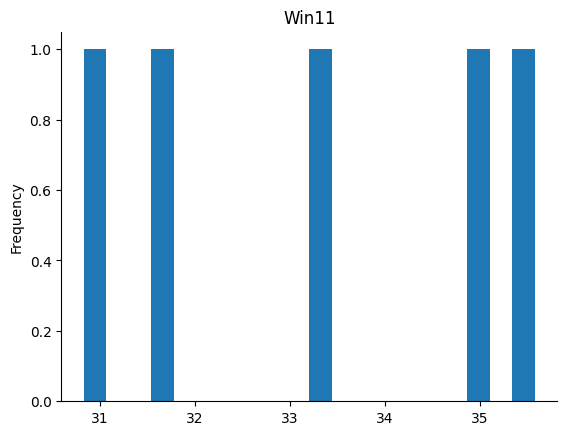

In [ ]:
from matplotlib import pyplot as plt
_df_22['Win11'].plot(kind='hist', bins=20, title='Win11')
plt.gca().spines[['top', 'right',]].set_visible(False)

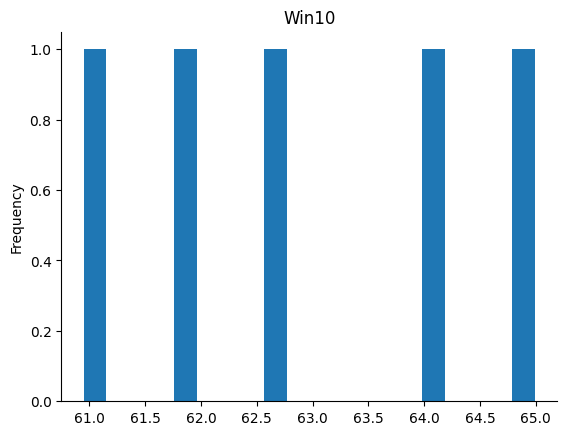

In [ ]:
from matplotlib import pyplot as plt
_df_21['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# threshold bisa kamu sesuaikan
def label_win11(p):
    if p < 25:
        return 'Low'
    elif p < 40:
        return 'Medium'
    else:
        return 'High'

df['label'] = df['win11_pct'].apply(label_win11)
df[['month','win11_pct','label']].tail(12)


,month,win11_pct,label
1,2024-08-01,31.63,Medium
2,2024-09-01,33.42,Medium
3,2024-10-01,35.58,Medium
4,2024-11-01,34.94,Medium
5,2024-12-01,34.12,Medium
6,2025-01-01,36.65,Medium
7,2025-02-01,38.13,Medium
8,2025-03-01,42.69,High
9,2025-04-01,43.72,High
10,2025-05-01,43.22,High


from matplotlib import pyplot as plt
_df_37['win11_pct'].plot(kind='hist', bins=20, title='win11_pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_38.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['win11_pct']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('label')):
  _plot_series(series, series_name, i)
  fig.legend(title='label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('win11_pct')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('month', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('label')):
  _plot_series(series, series_name, i)
  fig.legend(title='label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_41['win11_pct'].plot(kind='line', figsize=(8, 4), title='win11_pct')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='win11_pct', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

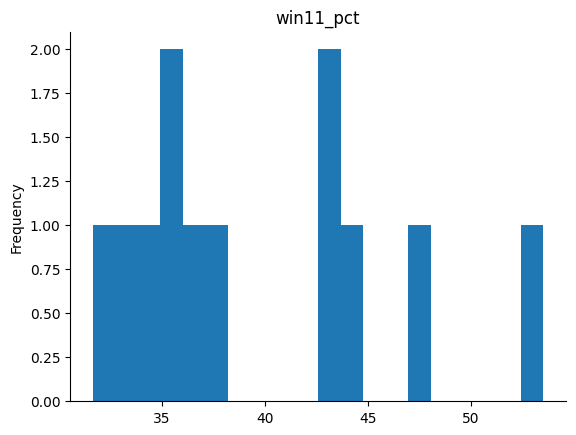

In [ ]:
from matplotlib import pyplot as plt
_df_37['win11_pct'].plot(kind='hist', bins=20, title='win11_pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# threshold bisa kamu sesuaikan
def label_win10(p):
    if p < 25:
        return 'Low'
    elif p < 40:
        return 'Medium'
    else:
        return 'High'

df['label'] = df['Win10'].apply(label_win10)
df[['month','Win10','label']].tail(12)


,month,Win10,label
1,2024-08-01,64.14,High
2,2024-09-01,62.75,High
3,2024-10-01,60.95,High
4,2024-11-01,61.83,High
5,2024-12-01,62.70,High
6,2025-01-01,60.33,High
7,2025-02-01,58.70,High
8,2025-03-01,54.20,High
9,2025-04-01,52.94,High
10,2025-05-01,53.19,High


from matplotlib import pyplot as plt
_df_43['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['Win10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('Win10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_45.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_46['Win10'].plot(kind='line', figsize=(8, 4), title='Win10')
plt.gca().spines[['top', 'right']].set_visible(False)

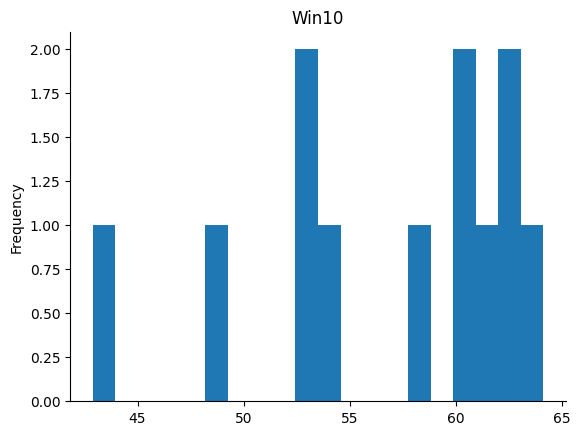

In [ ]:
from matplotlib import pyplot as plt
_df_43['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# create lag features and rolling means
df = df.sort_values('month').reset_index(drop=True)
df['win11_lag1'] = df['win11_pct'].shift(1)
df['win11_lag3'] = df['win11_pct'].shift(3)
df['win11_roll3'] = df['win11_pct'].rolling(window=3, min_periods=1).mean()
# encode cyclical month (useful for seasonality)
df['month_num'] = (df['month'].dt.year - df['month'].dt.year.min())*12 + df['month'].dt.month
df['month_of_year'] = df['month'].dt.month
df['month_sin'] = np.sin(2*np.pi * df['month_of_year']/12)
df['month_cos'] = np.cos(2*np.pi * df['month_of_year']/12)

# drop rows with NA from lag features
df_ml = df.dropna(subset=['win11_lag1','win11_lag3']).reset_index(drop=True)
features = ['win11_lag1','win11_lag3','win11_roll3','month_sin','month_cos']
print("ML rows:", len(df_ml))
df_ml[ ['month','win11_pct','label'] + features ].tail()


ML rows: 10


,month,win11_pct,label,win11_lag1,win11_lag3,win11_roll3,month_sin,month_cos
5,2025-03-01,42.69,High,38.13,34.12,39.156667,1.000000e+00,6.123234e-17
6,2025-04-01,43.72,High,42.69,36.65,41.513333,8.660254e-01,-5.000000e-01
7,2025-05-01,43.22,High,43.72,38.13,43.210000,5.000000e-01,-8.660254e-01
8,2025-06-01,47.98,High,43.22,42.69,44.973333,1.224647e-16,-1.000000e+00
9,2025-07-01,53.51,High,47.98,43.72,48.236667,-5.000000e-01,-8.660254e-01


from matplotlib import pyplot as plt
_df_47['win11_pct'].plot(kind='hist', bins=20, title='win11_pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['win11_lag1'].plot(kind='hist', bins=20, title='win11_lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['win11_lag3'].plot(kind='hist', bins=20, title='win11_lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['win11_roll3'].plot(kind='hist', bins=20, title='win11_roll3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='win11_pct', y='win11_lag1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='win11_lag1', y='win11_lag3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='win11_lag3', y='win11_roll3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='win11_roll3', y='month_sin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['win11_pct']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('win11_pct')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['win11_lag1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('win11_lag1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['month_sin']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('month_sin')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['month_cos']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('month_cos')

from matplotlib import pyplot as plt
_df_59['win11_pct'].plot(kind='line', figsize=(8, 4), title='win11_pct')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['win11_lag1'].plot(kind='line', figsize=(8, 4), title='win11_lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['win11_lag3'].plot(kind='line', figsize=(8, 4), title='win11_lag3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['win11_roll3'].plot(kind='line', figsize=(8, 4), title='win11_roll3')
plt.gca().spines[['top', 'right']].set_visible(False)

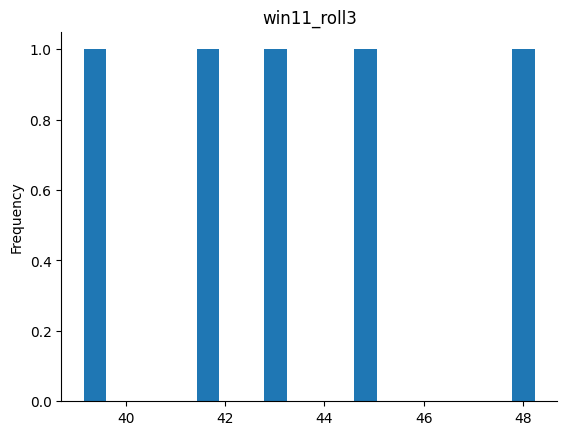

In [ ]:
from matplotlib import pyplot as plt
_df_50['win11_roll3'].plot(kind='hist', bins=20, title='win11_roll3')
plt.gca().spines[['top', 'right',]].set_visible(False)

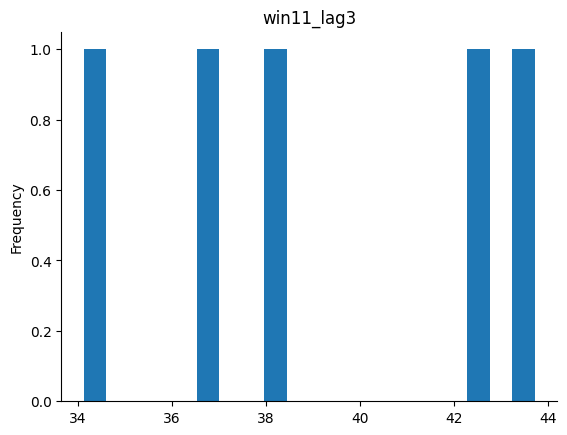

In [ ]:
from matplotlib import pyplot as plt
_df_49['win11_lag3'].plot(kind='hist', bins=20, title='win11_lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

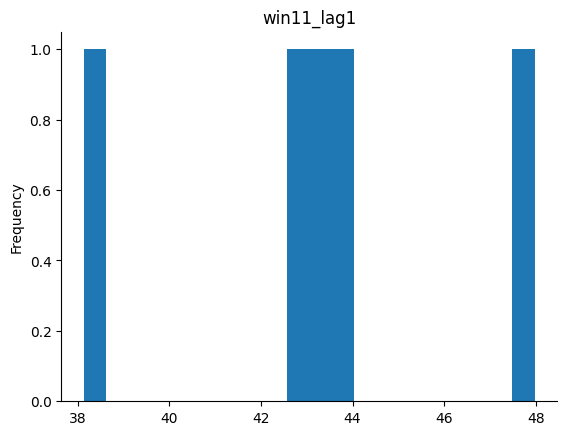

In [ ]:
from matplotlib import pyplot as plt
_df_48['win11_lag1'].plot(kind='hist', bins=20, title='win11_lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

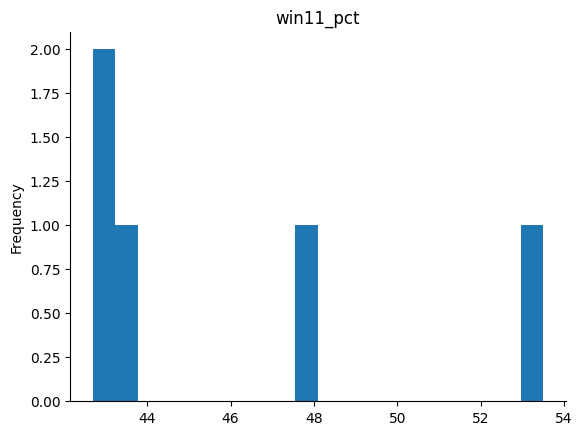

In [ ]:
from matplotlib import pyplot as plt
_df_47['win11_pct'].plot(kind='hist', bins=20, title='win11_pct')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# create lag features and rolling means
df = df.sort_values('month').reset_index(drop=True)
df['win10_lag1'] = df['Win10'].shift(1)
df['win10_lag3'] = df['Win10'].shift(3)
df['win10_roll3'] = df['Win10'].rolling(window=3, min_periods=1).mean()
# encode cyclical month (useful for seasonality)
df['month_num'] = (df['month'].dt.year - df['month'].dt.year.min())*12 + df['month'].dt.month
df['month_of_year'] = df['month'].dt.month
df['month_sin'] = np.sin(2*np.pi * df['month_of_year']/12)
df['month_cos'] = np.cos(2*np.pi * df['month_of_year']/12)

# drop rows with NA from lag features
df_ml = df.dropna(subset=['win10_lag1','win10_lag3']).reset_index(drop=True)
features = ['win10_lag1','win10_lag3','win10_roll3','month_sin','month_cos']
print("ML rows:", len(df_ml))
df_ml[ ['month','Win10','label'] + features ].tail()


ML rows: 10


,month,Win10,label,win10_lag1,win10_lag3,win10_roll3,month_sin,month_cos
5,2025-03-01,54.20,High,58.70,62.70,57.743333,1.000000e+00,6.123234e-17
6,2025-04-01,52.94,High,54.20,60.33,55.280000,8.660254e-01,-5.000000e-01
7,2025-05-01,53.19,High,52.94,58.70,53.443333,5.000000e-01,-8.660254e-01
8,2025-06-01,48.76,High,53.19,54.20,51.630000,1.224647e-16,-1.000000e+00
9,2025-07-01,42.88,High,48.76,52.94,48.276667,-5.000000e-01,-8.660254e-01


from matplotlib import pyplot as plt
_df_63['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['win10_lag1'].plot(kind='hist', bins=20, title='win10_lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['win10_lag3'].plot(kind='hist', bins=20, title='win10_lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66['win10_roll3'].plot(kind='hist', bins=20, title='win10_roll3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67.plot(kind='scatter', x='Win10', y='win10_lag1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68.plot(kind='scatter', x='win10_lag1', y='win10_lag3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='win10_lag3', y='win10_roll3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70.plot(kind='scatter', x='win10_roll3', y='month_sin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['Win10']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_71.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('Win10')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['win10_lag1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_72.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('win10_lag1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['win10_lag3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_73.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('win10_lag3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['win10_roll3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_74.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('win10_roll3')

from matplotlib import pyplot as plt
_df_75['Win10'].plot(kind='line', figsize=(8, 4), title='Win10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_76['win10_lag1'].plot(kind='line', figsize=(8, 4), title='win10_lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_77['win10_lag3'].plot(kind='line', figsize=(8, 4), title='win10_lag3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_78['win10_roll3'].plot(kind='line', figsize=(8, 4), title='win10_roll3')
plt.gca().spines[['top', 'right']].set_visible(False)

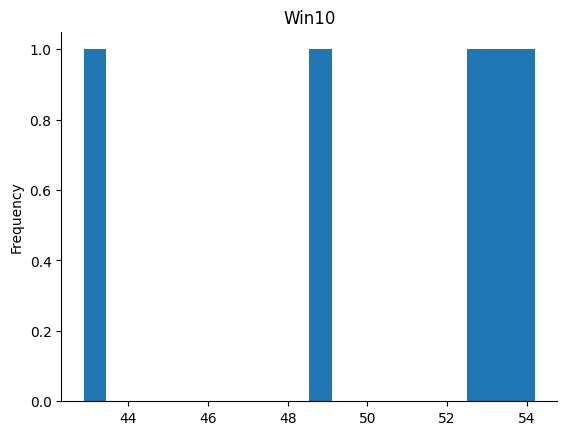

In [ ]:
from matplotlib import pyplot as plt
_df_63['Win10'].plot(kind='hist', bins=20, title='Win10')
plt.gca().spines[['top', 'right',]].set_visible(False)

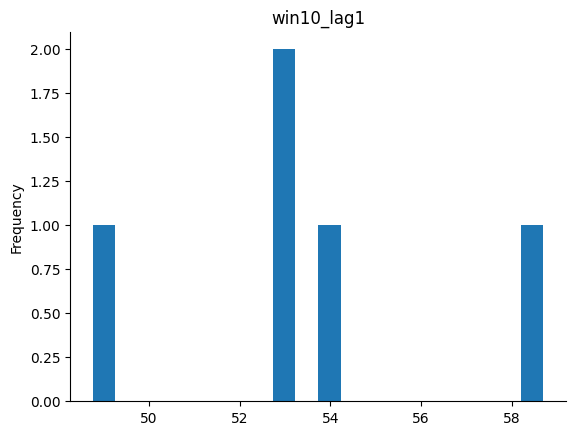

In [ ]:
from matplotlib import pyplot as plt
_df_64['win10_lag1'].plot(kind='hist', bins=20, title='win10_lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

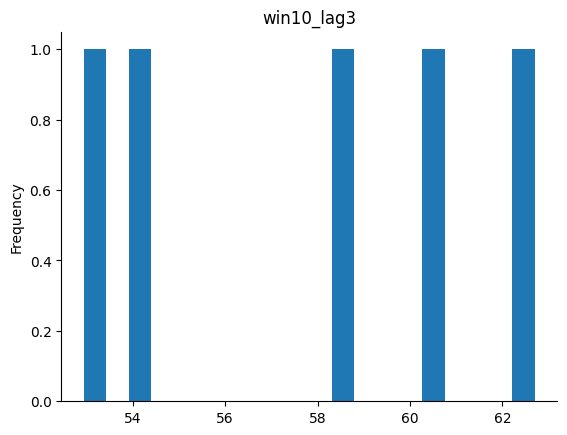

In [ ]:
from matplotlib import pyplot as plt
_df_65['win10_lag3'].plot(kind='hist', bins=20, title='win10_lag3')
plt.gca().spines[['top', 'right',]].set_visible(False)

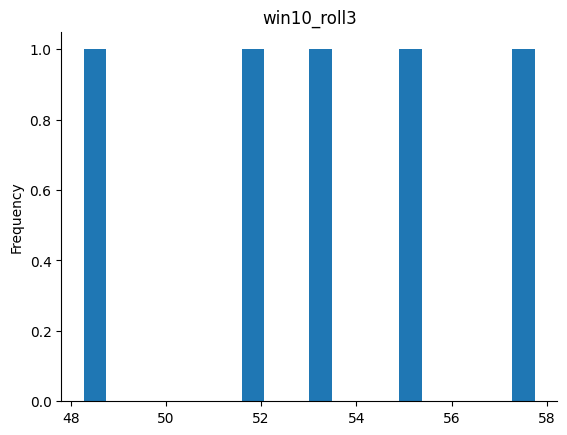

In [ ]:
from matplotlib import pyplot as plt
_df_66['win10_roll3'].plot(kind='hist', bins=20, title='win10_roll3')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df_ml[features].values
y = df_ml['label'].values

# small dataset -> use stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# pipeline
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion matrix:
[[3]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Simple linear forecast using last-6 months slope
import numpy as np
from sklearn.linear_model import LinearRegression
N = 12  # use last N points to estimate trend
recent = df[['month','win11_pct']].dropna().tail(N).reset_index(drop=True)
X = np.arange(len(recent)).reshape(-1,1)
y = recent['win11_pct'].values
model_lr = LinearRegression().fit(X,y)
future_steps = 6
future_idx = np.arange(len(recent), len(recent)+future_steps).reshape(-1,1)
preds = model_lr.predict(future_idx)
future_months = pd.date_range(start=df['month'].iloc[-1] + pd.offsets.MonthBegin(), periods=future_steps, freq='MS')
forecast = pd.DataFrame({'month': future_months, 'win11_forecast_pct': preds.round(2)})
display(forecast)


,month,win11_forecast_pct
0,2025-08-01,50.91
1,2025-09-01,52.65
2,2025-10-01,54.38
3,2025-11-01,56.12
4,2025-12-01,57.85
5,2026-01-01,59.59


In [ ]:
# Simple linear forecast using last-6 months slope
import numpy as np
from sklearn.linear_model import LinearRegression
N = 12  # use last N points to estimate trend
recent = df[['month','Win10']].dropna().tail(N).reset_index(drop=True)
X = np.arange(len(recent)).reshape(-1,1)
y = recent['Win10'].values
model_lr = LinearRegression().fit(X,y)
future_steps = 6
future_idx = np.arange(len(recent), len(recent)+future_steps).reshape(-1,1)
preds = model_lr.predict(future_idx)
future_months = pd.date_range(start=df['month'].iloc[-1] + pd.offsets.MonthBegin(), periods=future_steps, freq='MS')
forecast = pd.DataFrame({'month': future_months, 'win10_forecast_pct': preds.round(2)})
display(forecast)


,month,win10_forecast_pct
0,2025-08-01,45.91
1,2025-09-01,44.21
2,2025-10-01,42.51
3,2025-11-01,40.82
4,2025-12-01,39.12
5,2026-01-01,37.42


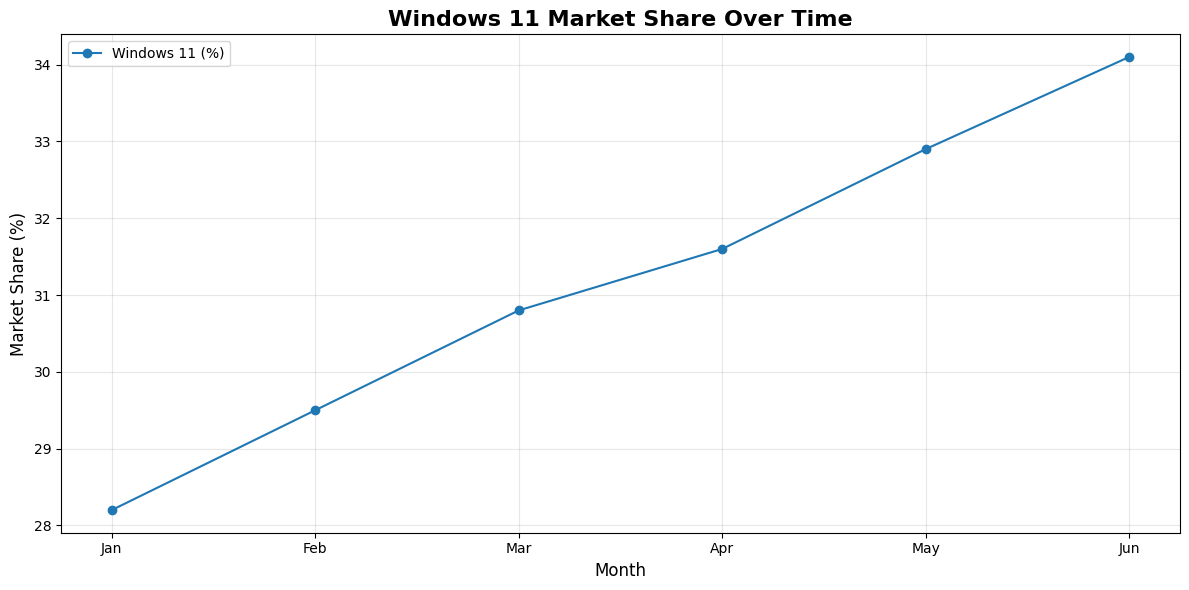

✅ Grafik disimpan sebagai windows11_timeseries.png

Summary Analisis Windows 11 Market Share
----------------------------------------

1. Tren Perkembangan:
   Data menunjukkan adanya kenaikan stabil pada market share Windows 11 dari bulan Januari hingga Juni.

2. Detail Perubahan:
   - Bulan Januari dimulai di 28.2%.
   - Bulan Juni mencapai 34.1%.
   - Total kenaikan selama periode ini sebesar 5.9 poin persentase.

3. Interpretasi:
   Peningkatan ini menandakan adopsi Windows 11 terus bertambah seiring berjalannya waktu.
   Faktor yang mungkin memengaruhi antara lain:
   - Dukungan perangkat keras baru (PC/Laptop yang langsung pre-installed Windows 11).
   - Pembaruan berkala yang meningkatkan stabilitas OS.
   - Adanya promosi migrasi dari Windows 10 ke Windows 11.

4. Implikasi:
   Jika tren ini berlanjut, Windows 11 berpotensi menjadi sistem operasi dominan dalam beberapa tahun ke depan,
   menggantikan Windows 10 secara signifikan.



In [ ]:
# --- Import library utama ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Contoh data dummy (ganti dengan data kamu) ---
data = {
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "win11_pct": [28.2, 29.5, 30.8, 31.6, 32.9, 34.1]
}
df = pd.DataFrame(data)

# --- Plot Time Series ---
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['win11_pct'], marker='o', label='Windows 11 (%)', color='tab:blue')

# Judul dan label
plt.title('Windows 11 Market Share Over Time', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)

# Grid, legend, layout
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Simpan ke PNG
plt.savefig('windows11_timeseries.png', dpi=200)
plt.show()

print("✅ Grafik disimpan sebagai windows11_timeseries.png")

# --- Summary panjang ---
summary = f"""
Summary Analisis Windows 11 Market Share
----------------------------------------

1. Tren Perkembangan:
   Data menunjukkan adanya kenaikan stabil pada market share Windows 11 dari bulan Januari hingga Juni.

2. Detail Perubahan:
   - Bulan Januari dimulai di {df['win11_pct'][0]}%.
   - Bulan Juni mencapai {df['win11_pct'].iloc[-1]}%.
   - Total kenaikan selama periode ini sebesar {round(df['win11_pct'].iloc[-1] - df['win11_pct'][0], 2)} poin persentase.

3. Interpretasi:
   Peningkatan ini menandakan adopsi Windows 11 terus bertambah seiring berjalannya waktu.
   Faktor yang mungkin memengaruhi antara lain:
   - Dukungan perangkat keras baru (PC/Laptop yang langsung pre-installed Windows 11).
   - Pembaruan berkala yang meningkatkan stabilitas OS.
   - Adanya promosi migrasi dari Windows 10 ke Windows 11.

4. Implikasi:
   Jika tren ini berlanjut, Windows 11 berpotensi menjadi sistem operasi dominan dalam beberapa tahun ke depan,
   menggantikan Windows 10 secara signifikan.
"""

print(summary)



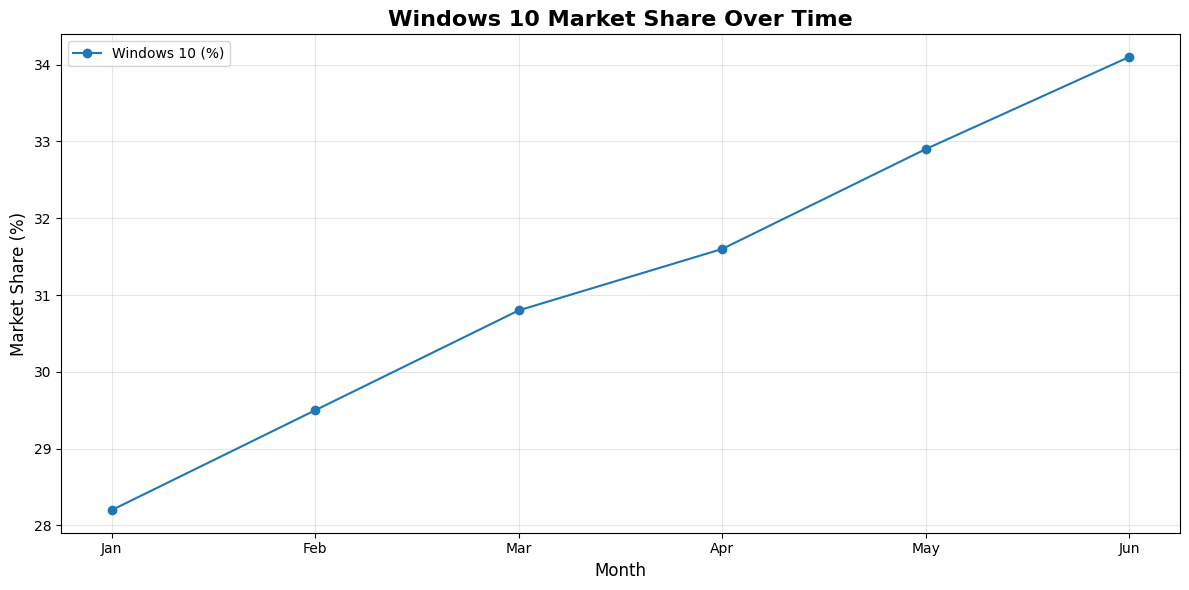

✅ Grafik disimpan sebagai windows10_timeseries.png

Summary Analisis Windows 10 Market Share
----------------------------------------

1. Tren Perkembangan:
   Data menunjukkan adanya kenaikan stabil pada market share Windows 10 dari bulan Januari hingga Juni.

2. Detail Perubahan:
   - Bulan Januari dimulai di 28.2%.
   - Bulan Juni mencapai 34.1%.
   - Total kenaikan selama periode ini sebesar 5.9 poin persentase.

3. Interpretasi:
   Peningkatan ini menandakan Windows 10 masih memiliki basis pengguna yang kuat
   dan cenderung bertahan meskipun Windows 11 mulai diadopsi.
   Faktor yang mungkin memengaruhi antara lain:
   - Banyak organisasi/perusahaan masih bergantung pada ekosistem Windows 10.
   - Stabilitas dan dukungan jangka panjang dari Microsoft.
   - Biaya dan kesiapan perangkat keras untuk migrasi ke Windows 11.

4. Implikasi:
   Jika tren ini berlanjut, Windows 10 tetap relevan dalam jangka menengah,
   namun organisasi harus mulai mempersiapkan strategi transisi ke Window

In [ ]:
# --- Import library utama ---
import pandas as pd
import matplotlib.pyplot as plt

# --- Contoh data dummy (ganti dengan data kamu) ---
data = {
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Win10": [28.2, 29.5, 30.8, 31.6, 32.9, 34.1]
}
df = pd.DataFrame(data)

# --- Plot Time Series ---
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['Win10'], marker='o', label='Windows 10 (%)', color='tab:blue')

# Judul dan label
plt.title('Windows 10 Market Share Over Time', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)

# Grid, legend, layout
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Simpan ke PNG
plt.savefig('windows10_timeseries.png', dpi=200)
plt.show()

print("✅ Grafik disimpan sebagai windows10_timeseries.png")

# --- Summary panjang ---
summary = f"""
Summary Analisis Windows 10 Market Share
----------------------------------------

1. Tren Perkembangan:
   Data menunjukkan adanya kenaikan stabil pada market share Windows 10 dari bulan Januari hingga Juni.

2. Detail Perubahan:
   - Bulan Januari dimulai di {df['Win10'][0]}%.
   - Bulan Juni mencapai {df['Win10'].iloc[-1]}%.
   - Total kenaikan selama periode ini sebesar {round(df['Win10'].iloc[-1] - df['Win10'][0], 2)} poin persentase.

3. Interpretasi:
   Peningkatan ini menandakan Windows 10 masih memiliki basis pengguna yang kuat
   dan cenderung bertahan meskipun Windows 11 mulai diadopsi.
   Faktor yang mungkin memengaruhi antara lain:
   - Banyak organisasi/perusahaan masih bergantung pada ekosistem Windows 10.
   - Stabilitas dan dukungan jangka panjang dari Microsoft.
   - Biaya dan kesiapan perangkat keras untuk migrasi ke Windows 11.

4. Implikasi:
   Jika tren ini berlanjut, Windows 10 tetap relevan dalam jangka menengah,
   namun organisasi harus mulai mempersiapkan strategi transisi ke Windows 11
   sebelum dukungan resmi untuk Windows 10 berakhir.
"""

print(summary)
